In [1]:
import pandas as pd # Data wraggling
import matplotlib as mpl # Plotting functionalities
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # Numerical computation
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400 # High resolution figures

In [2]:
df = pd.read_csv('CaseStudyFile/Chapter_1_cleaned_data.csv')

In [3]:
from numpy.random import default_rng

In [4]:
rg = default_rng(4)

In [5]:
X_1_pos = rg.uniform(low = 1, high = 7, size = (20,1))
X_1_neg = rg.uniform(low = 3, high = 10, size = (20, 1))
X_2_pos = rg.uniform(low = 1, high = 7, size =(20, 1))
X_2_neg = rg.uniform(low = 3, high = 10, size = (20, 1))

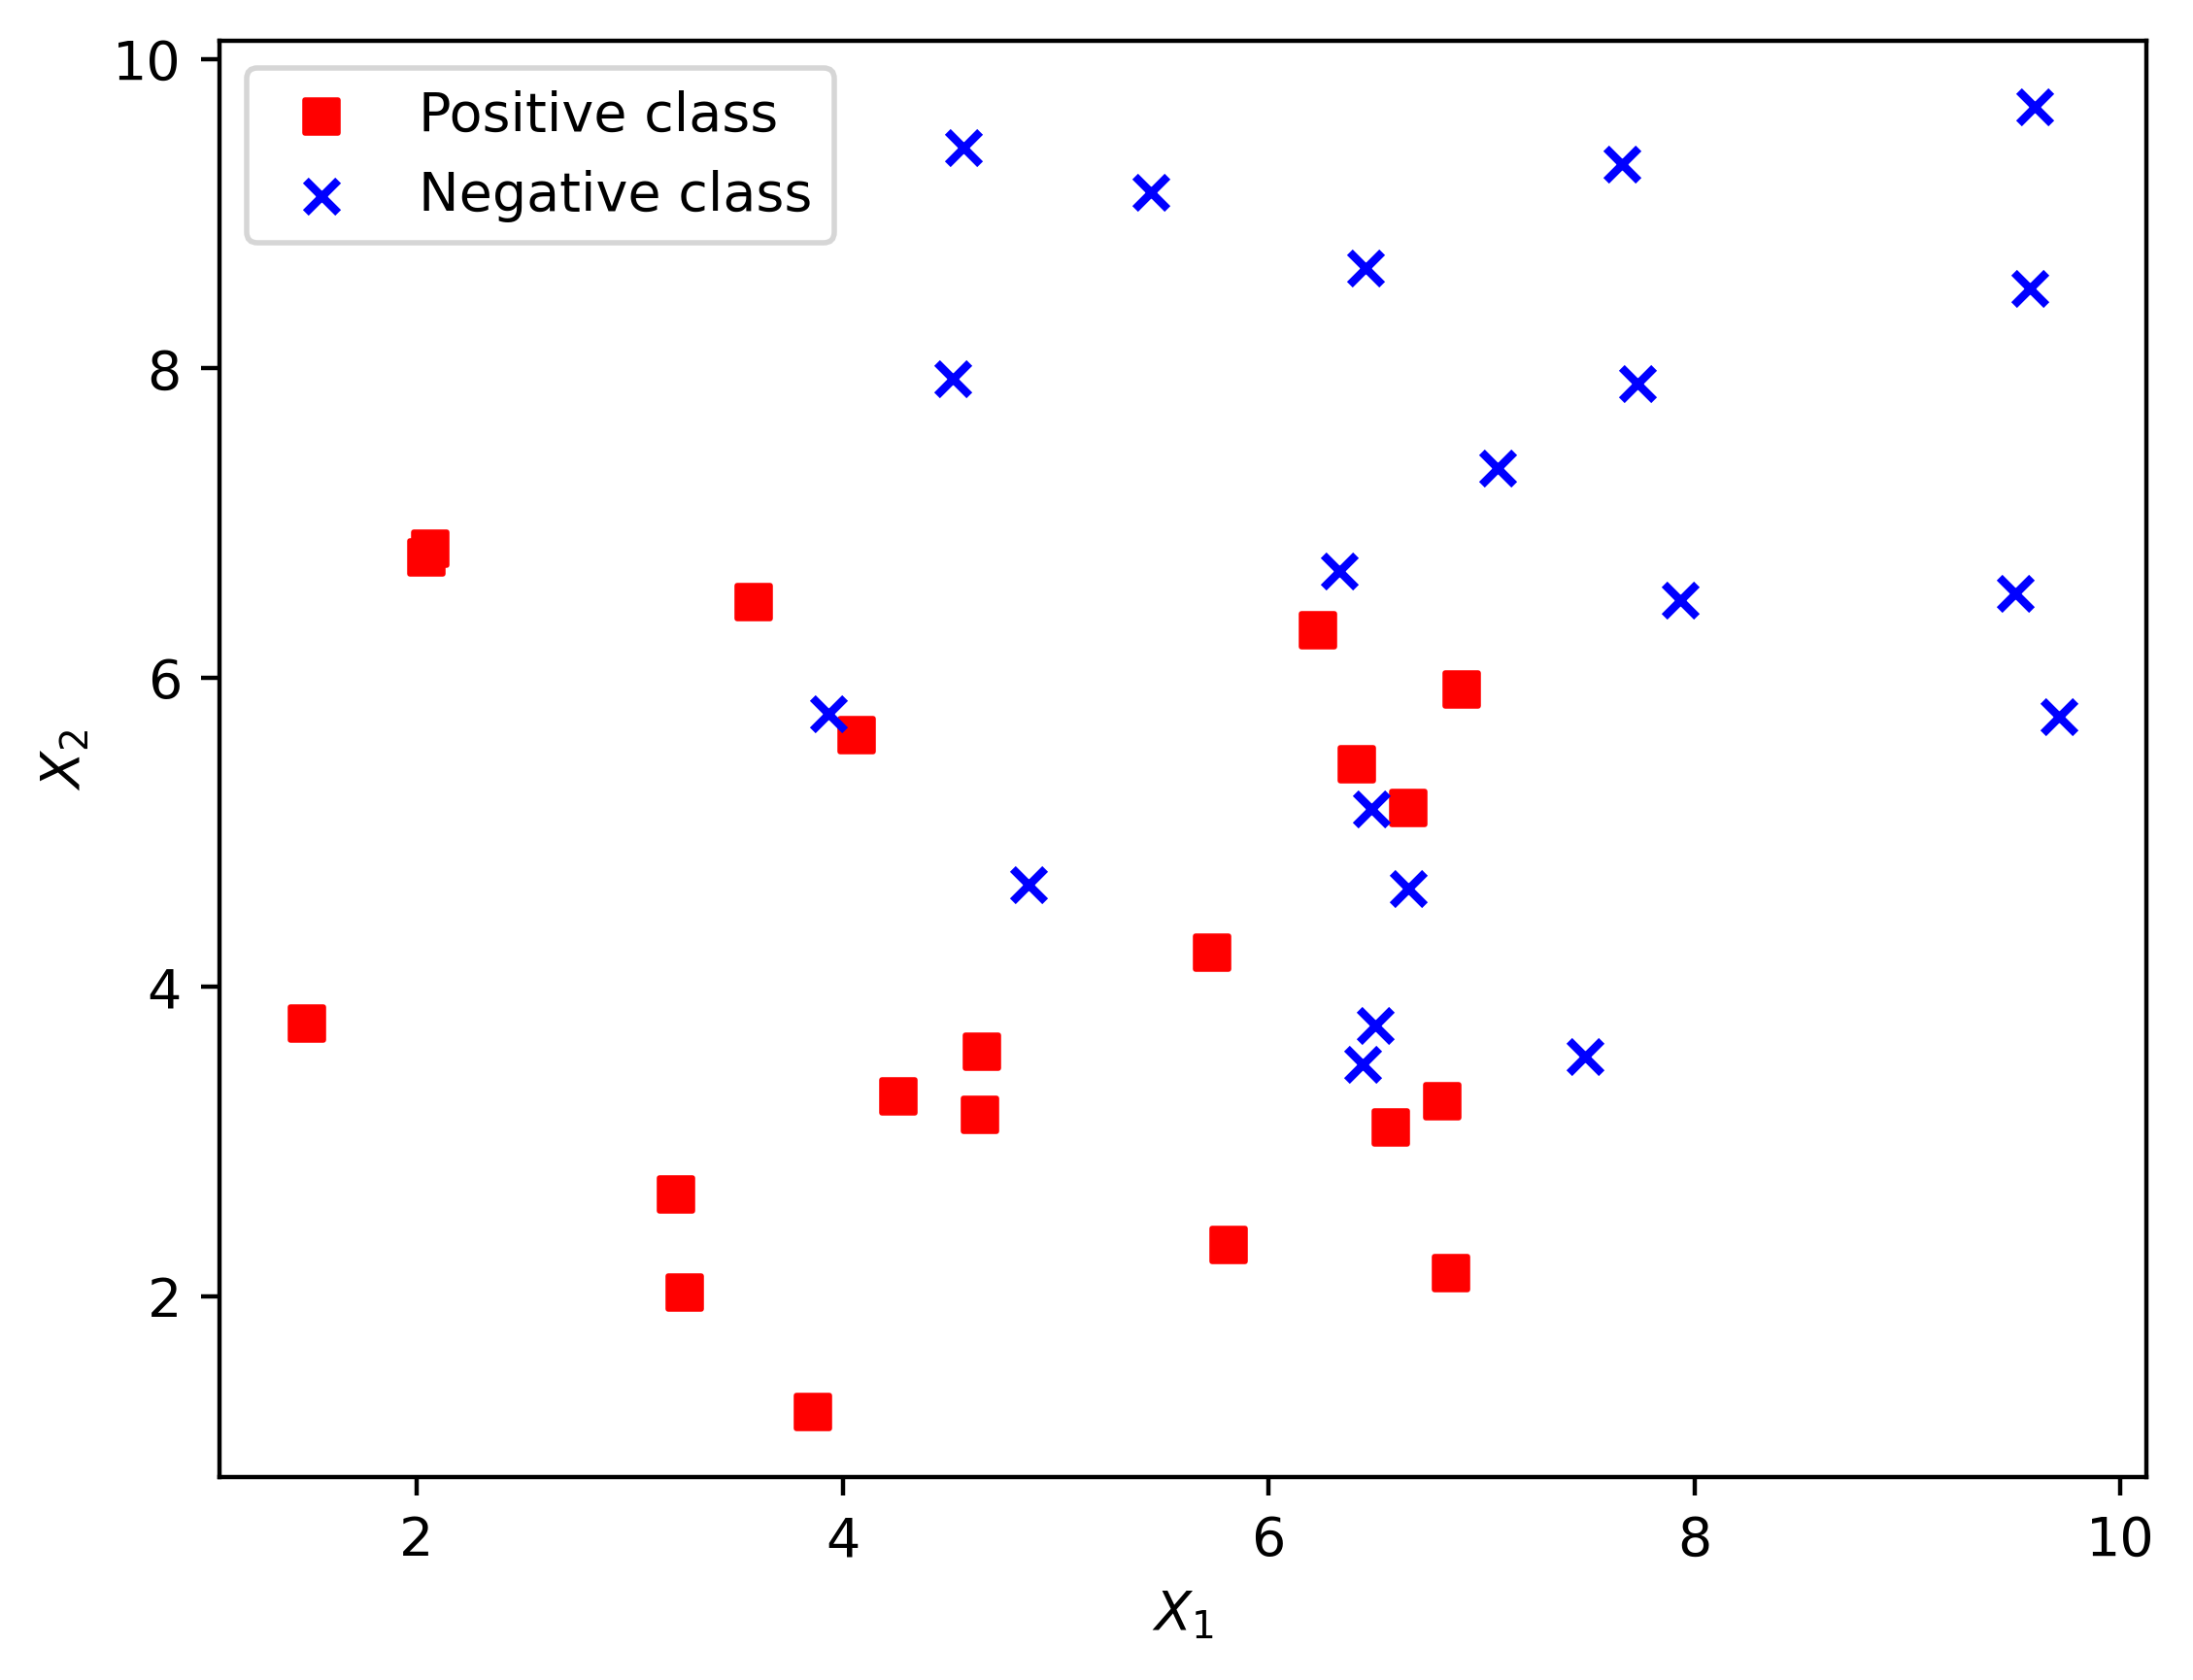

In [6]:
# Plotting the scatter plot for the positive and negative classes
plt.scatter(X_1_pos, X_2_pos, color = 'red', marker ='s')
plt.scatter(X_1_neg, X_2_neg, color = 'blue', marker = 'x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [7]:
# Creating a 40x2 matrix
X = np.block([[X_1_pos, X_2_pos],[X_1_neg, X_2_neg]])
X.shape

(40, 2)

In [8]:
print(X[0:3])

[[6.65833663 5.15531227]
 [4.06796532 5.6237829 ]
 [6.85746223 2.14473103]]


In [19]:
# Creating a vstack(vertical stack) for response variable y
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [10]:
# Fitting the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model

LogisticRegression(solver='liblinear')

In [11]:
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [20]:
y_predict = model.predict(X)

In [27]:
# Seperate the predictions(positive and negative) into indices
pos_indices =[counter for counter in range(len(y_predict)) if y_predict[counter] == 1]
neg_indices = [counter for counter in range(len(y_predict)) if y_predict[counter] == 0]
pos_indices
#neg_indices

[2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19, 26, 34, 36]

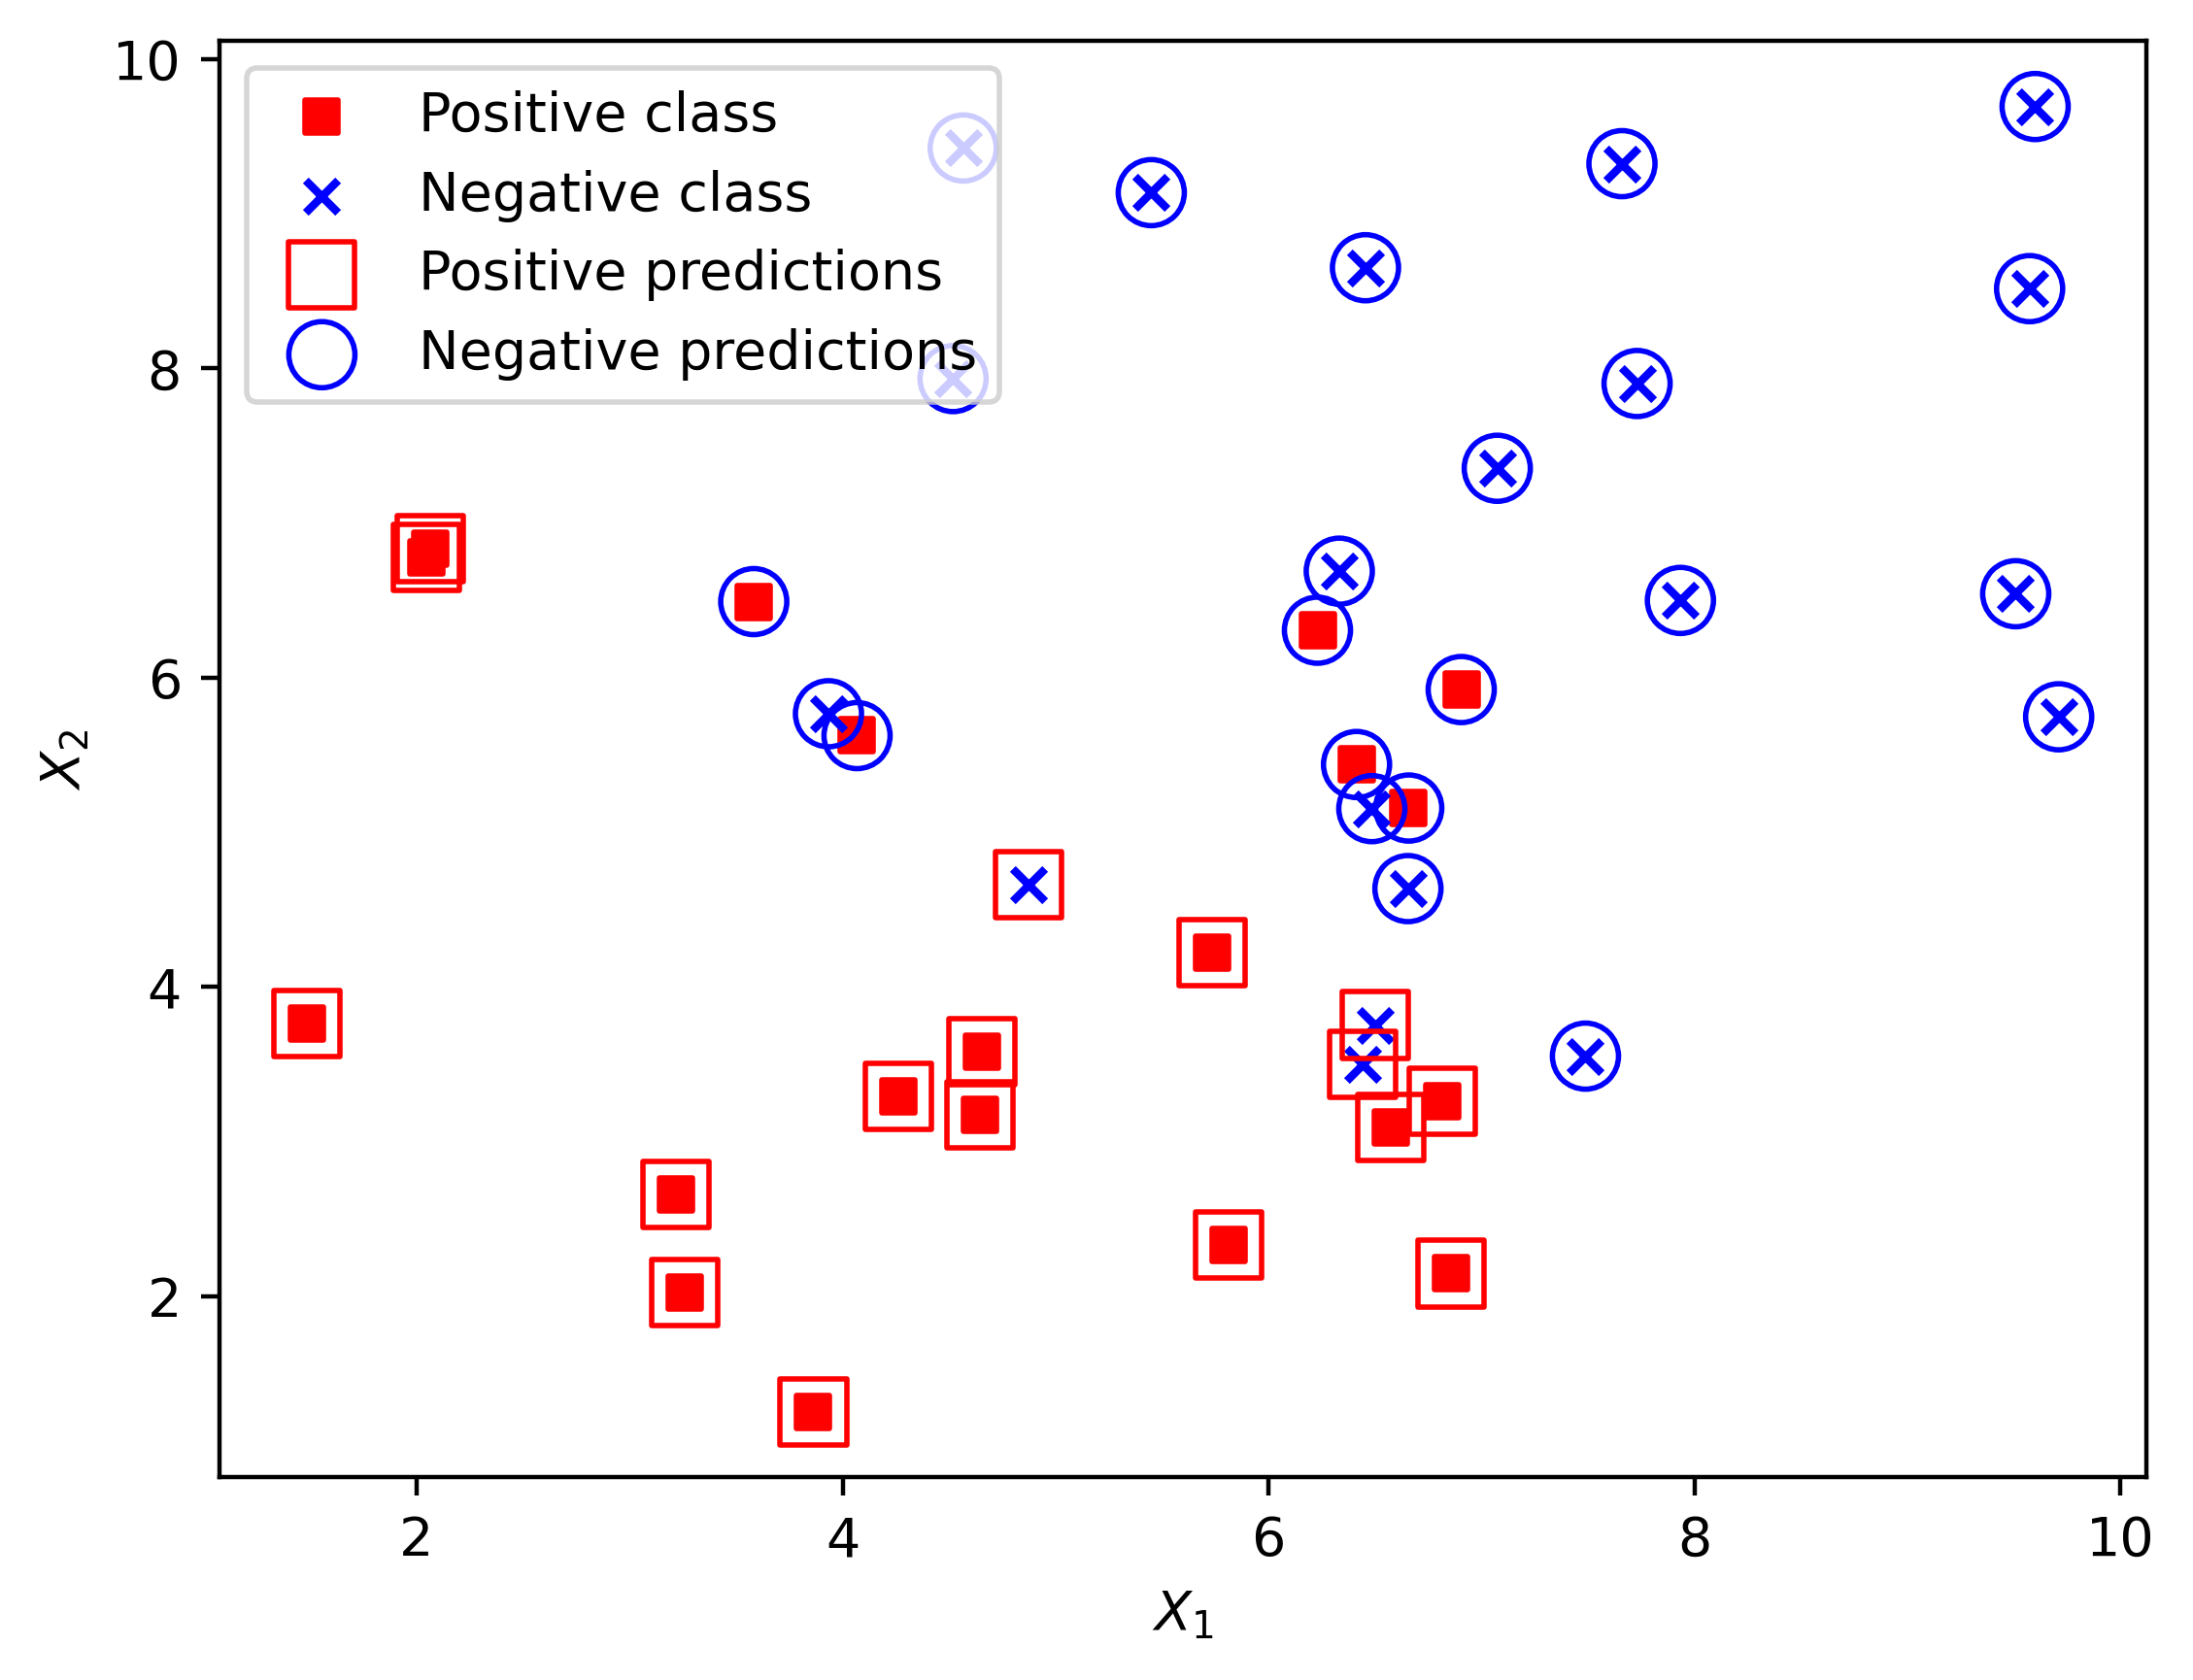

In [29]:
plt.scatter(X_1_pos, X_2_pos, color ='red', marker ='s')
plt.scatter(X_1_neg, X_2_neg, color ='blue', marker ='x')
plt.scatter(X[pos_indices, 0], X[pos_indices, 1], s = 150, marker ='s', edgecolors ='red', facecolors ='none')
plt.scatter(X[neg_indices, 0], X[neg_indices, 1], s = 150, marker ='o', edgecolors ='blue', facecolors ='none')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend(["Positive class", "Negative class", "Positive predictions", "Negative predictions"])